## Machine Learning and Statistics Assessment 2019 - Lucia Saura

# Boston Data Set Analysis

## 1. Research and Introduction

The Boston housing data set represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts in 506 entries. It was collected in 1978 and presents the Median home values of Boston with associated home and neighborhood attributes.

The data was originally published by Harrison, D. and Rubinfeld, D.L. for discovering the influence of air pollution using nitrous oxide as a variable to find whether the air is clean or not in Boston "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978.



Trough this project the data set will be analysed from different angles to make predictions using machine learning trough the technology tools decribed below.

*Soruces:*

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


### Technology/packages description

**Scipy**

SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:

- NumPy

- SciPy library. Fundamental library for scientific computing

- Matplotlib. Comprehensive 2-D plotting

- IPython. Enhanced interactive console

- SymPy. Symbolic mathematics

- Pandas. Data structures & analysis

*Source:* https://www.scipy.org/


**Numpy**

Numpy is an open source library written in C++, it is the fundamental package for scientific computing with Python.
It adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


It contains among other things:

- a powerful N-dimensional array object. NumPy targets the CPython reference implementation of Python, which is a non-optimizing bytecode interpreter. Mathematical algorithms written for this version of Python often run much slower than compiled equivalents. NumPy addresses the slowness problem partly by providing multidimensional arrays and functions and operators that operate efficiently on arrays, requiring rewriting some code, mostly inner loops using NumPy.

- sophisticated (broadcasting) functions. Broadcasting is the name given to the method that NumPy uses to allow array arithmetic between arrays with a different shape or size. Broadcasting solves the problem of arithmetic between arrays of differing shapes by in effect replicating the smaller array along the last mismatched dimension.

- tools for integrating C/C++ and Fortran code; tools such as f2py, Cython or ctypes. 

- useful linear algebra, Fourier transform, and random number capabilities

In early 2005, NumPy developer Travis Oliphant wanted to unify the community around a single array package and ported Numarray's features to Numeric, releasing the result as NumPy 1.0 in 2006. This new project was part of SciPy. To avoid installing the large SciPy package just to get an array object, this new package was separated and called NumPy.

*Sources:*
https://numpy.org/
https://en.wikipedia.org/wiki/NumPy
https://machinelearningmastery.com/broadcasting-with-numpy-arrays/
https://towardsdatascience.com/how-to-understand-numpy-documentation-897d5307609b


**Keras**

Keras is an open source high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 
"Being able to go from idea to result with the least possible delay is key to doing good research."

Its primary author and maintainer is François Chollet, a Google engineer.

Keras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing Deep Neural Network code. The code is hosted on GitHub.

Keras allows users to productize deep models on smartphones (iOS and Android), on the web, or on the Java Virtual Machine.


*Sources:*
https://keras.io/
https://en.wikipedia.org/wiki/Keras#



**Tensorflow**

TensorFlow is an end-to-end open source platform for machine learning. It is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google.

TensorFlow was developed by the Google Brain team for internal Google use. It was released under the Apache License 2.0 on November 9, 2015.


*Sources:* 
https://www.tensorflow.org/
https://en.wikipedia.org/wiki/TensorFlow




### General information about the Boston housing data set

In the cells below the data frame is imported from the scikit-learn library.

The following commands show a description of the general overview of the data set.

It contains 506 rows and 14 columns with the following attribute information:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [34]:
#Import basic packages
# For numerical arrays.
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
# For data frames.
import pandas as pd
from pandas.plotting import scatter_matrix as scat
# For neural networks.
import keras as kr
import seaborn as sns 
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening
import sklearn.decomposition as dec

%matplotlib inline

In [2]:
#Import Boston data set
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Show the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Number of rows and columns in the dataset
print(boston.data.shape)

(506, 13)


In [5]:
#Column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#Converting the dataset to pandas
bostondf = pd.DataFrame(boston.data)
#showing the first column as column names
bostondf.columns = boston.feature_names

#printing the data set
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
#Printing the column target (Price)
target = pd.DataFrame(boston.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


### Descriptive statistics

Descriptive statistics involves summarizing and organizing the data so they can be easily understood. Descriptive statistics, unlike inferential statistics, seeks to describe the data, but do not attempt to make inferences from the sample to the whole population. This generally means that descriptive statistics, unlike inferential statistics, is not developed on the basis of probability theory.

Descriptive statistics are broken down into two categories. Measures of central tendency (mean) and measures of variability or spread (standard deviation).

*Source:
https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291

In [8]:
#printing on screen the mean of each attribute
bostondf.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [9]:
#printing on screen the mean of the target column
price= boston.target
price.mean()

22.532806324110677

In [10]:
#Adding the target column (Price) to be shown in the dataset

bostondf['MEDV'] = boston.target

#printing the first rows of the dataset
print(bostondf.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [11]:
#summary of the boston data set
print(bostondf.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

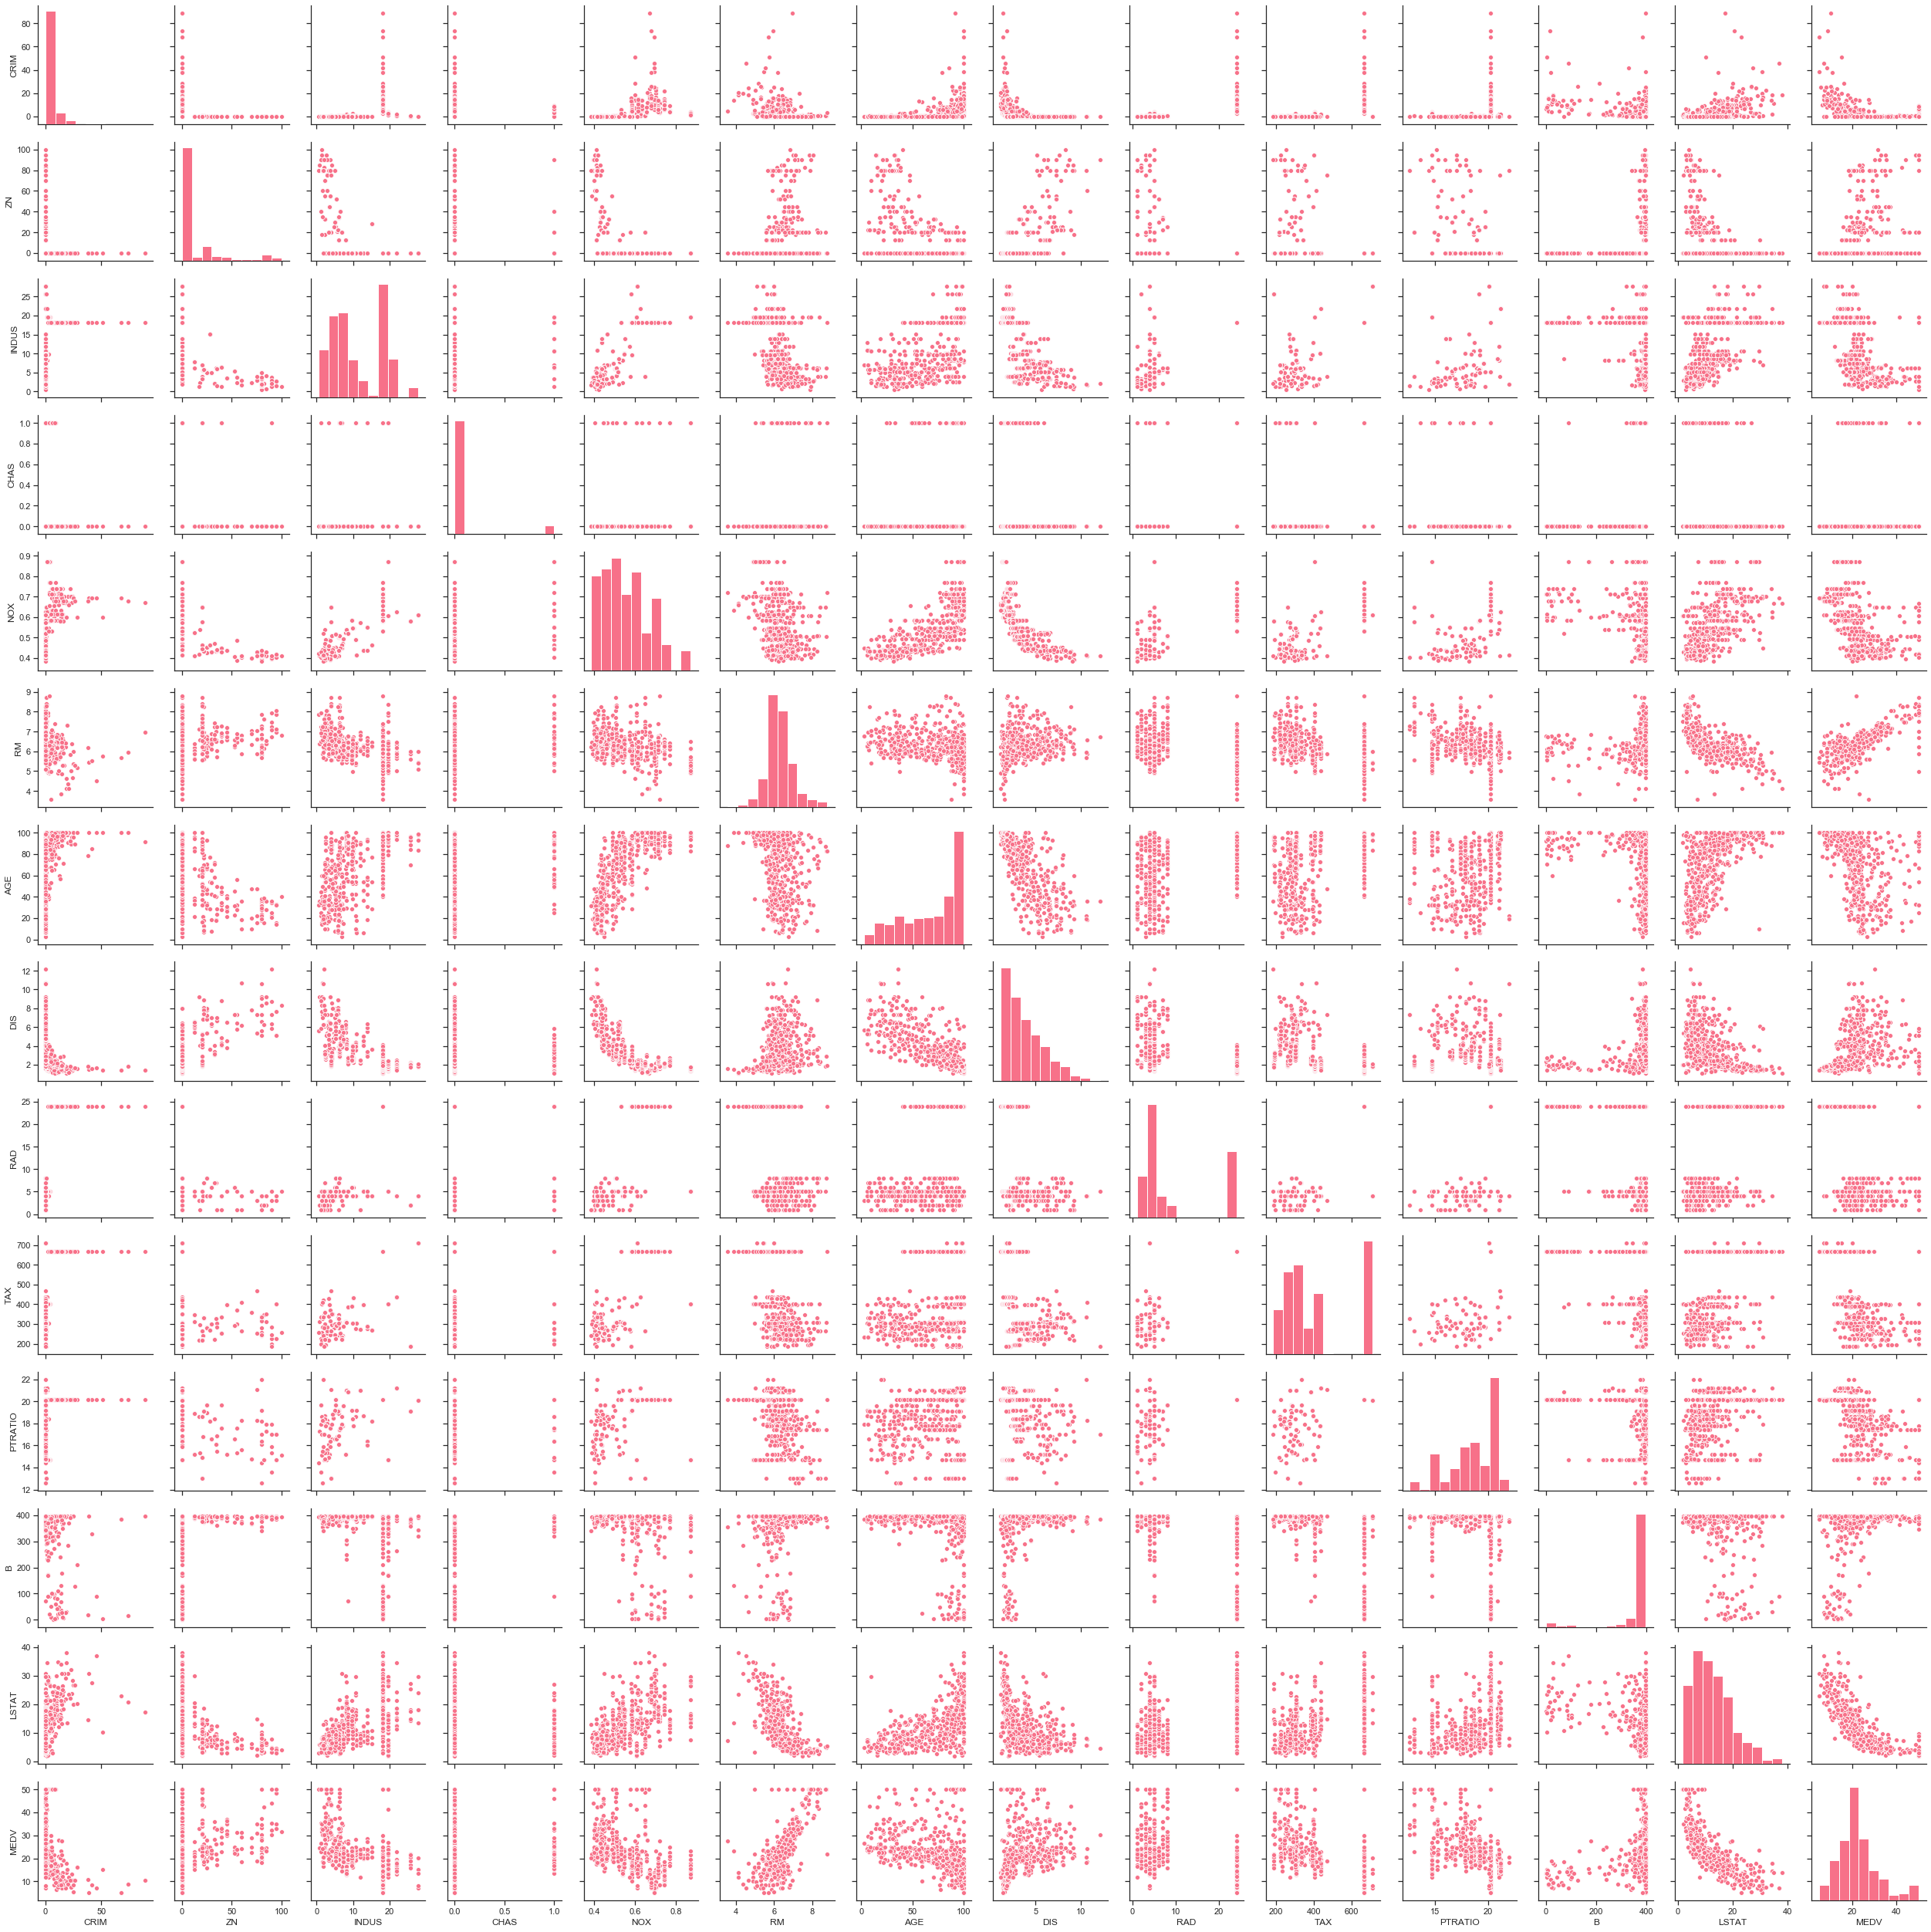

In [44]:
sns.set(style="ticks", palette="husl", color_codes=True)


g = sns.pairplot(bostondf)


import matplotlib.pyplot as plt
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a465f66d8>,
      dtype=object)

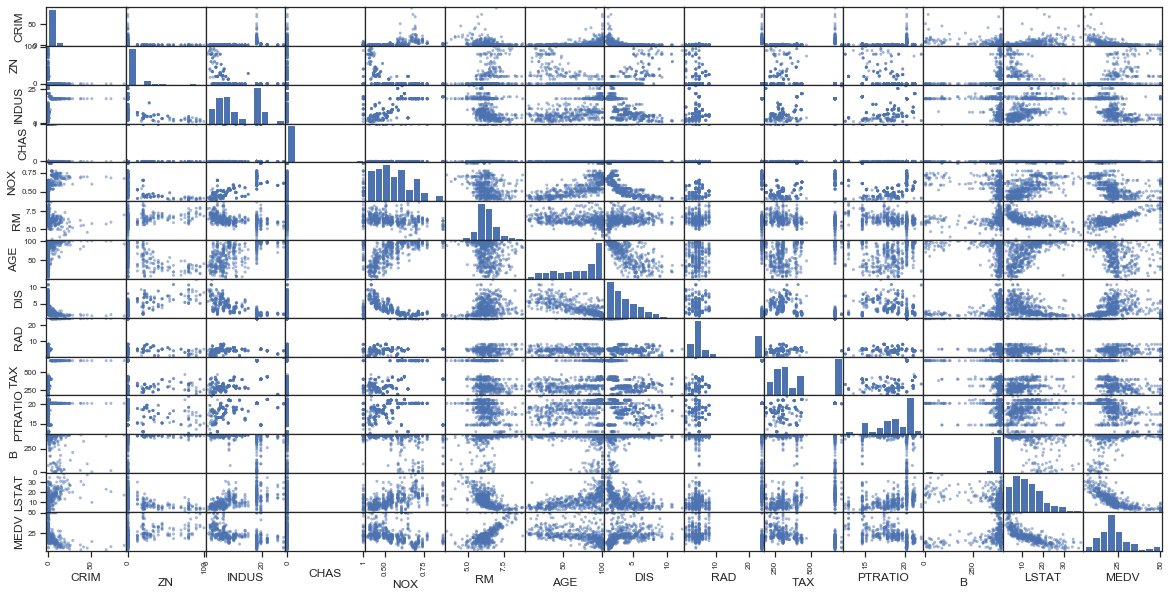

In [41]:
pd.plotting.scatter_matrix

scat(bostondf, figsize=(20,10), diagonal='hist')



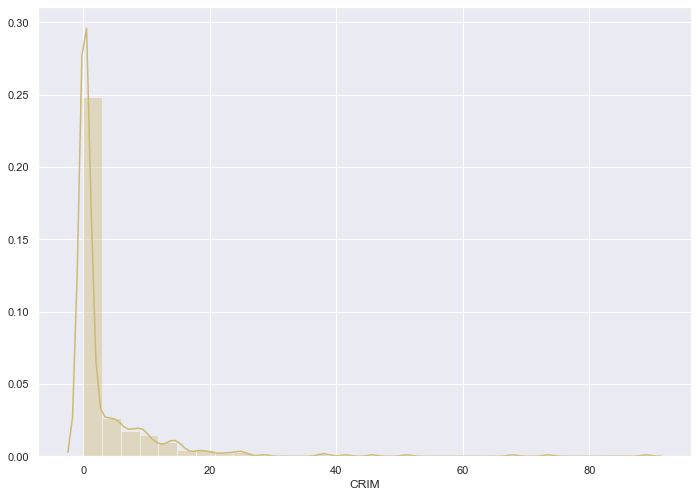

In [21]:
#Getting the info of crime rate
C = bostondf['CRIM']


# Using pyplot to plot the distribution of crime rate

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(C, color="y", bins=30)
plt.show()

 :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

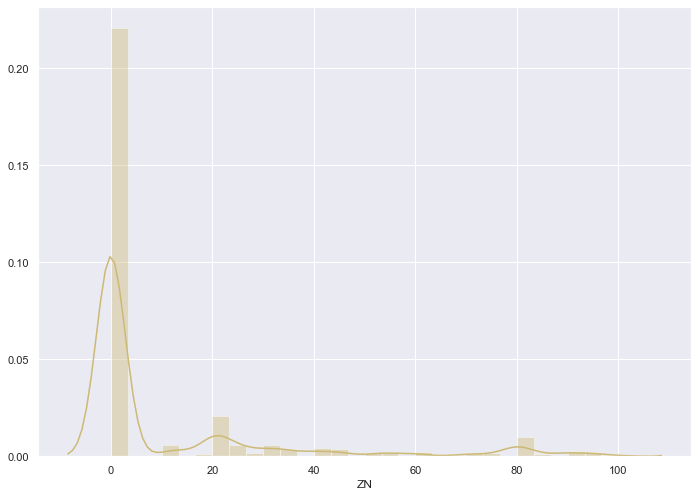

In [17]:
#Getting the info of the proportion of residential land zoned for lots over 25,000 sq.ft
Z = bostondf['ZN']


# Using pyplot to plot the distribution of the proportion of residential land zoned for lots over 25,000 sq.ft

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Z, color="y", bins=30)
plt.show()

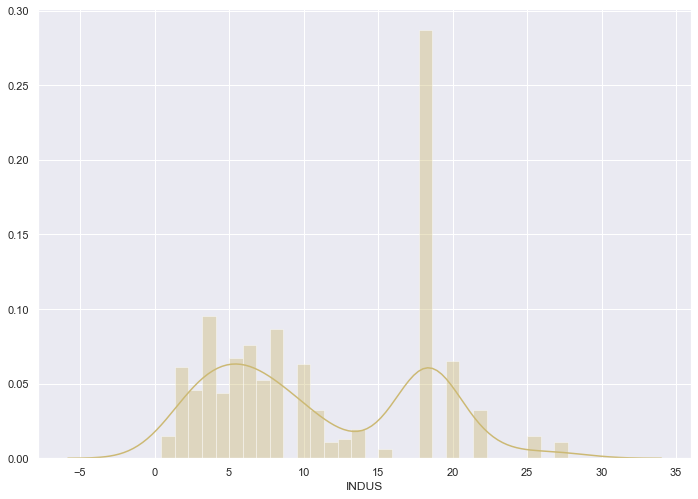

In [18]:
#Getting the info of the proportion of non-retail business acres per town
I = bostondf['INDUS']


# Using pyplot to plot the distribution of the proportion of non-retail business acres per town

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(I, color="y", bins=30)
plt.show()

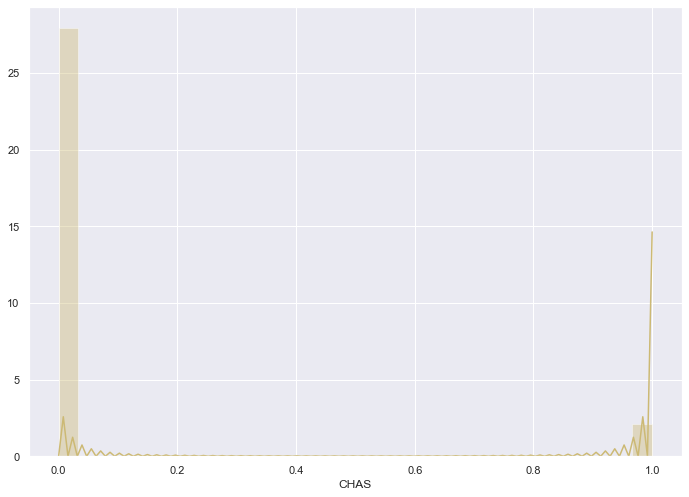

In [18]:
#Getting the info about the houses facing or not facing the river
CH = bostondf['CHAS']


# Using pyplot to plot about the houses facing or not facing the river
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(CH, color="y", bins=30)
plt.show()

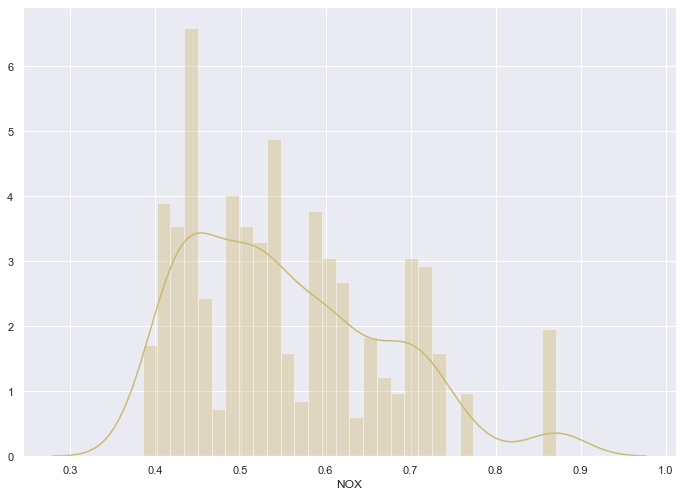

In [17]:
#Getting the info of the nitric oxides concentration 
N = bostondf['NOX']


# Using pyplot to plot the distribution of the nitric oxides concentration

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(N, color="y", bins=30)
plt.show()

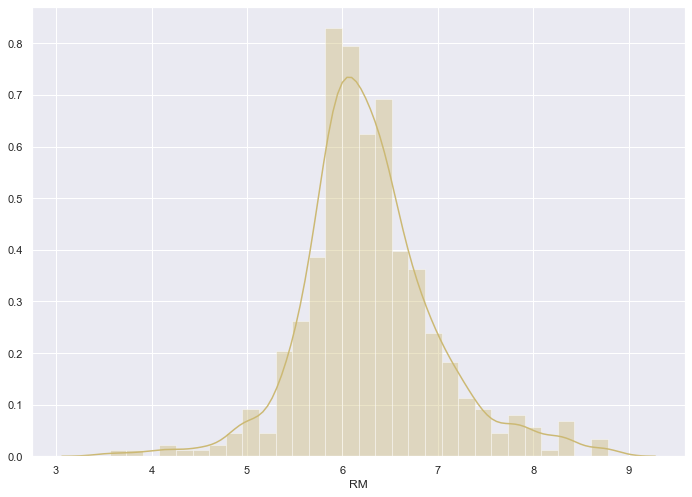

In [19]:
#Getting the info of the houses average number of rooms per dwelling
R = bostondf['RM']


# Using pyplot to plot the distribution of the houses average number of rooms per dwelling

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(R, color="y", bins=30)
plt.show()

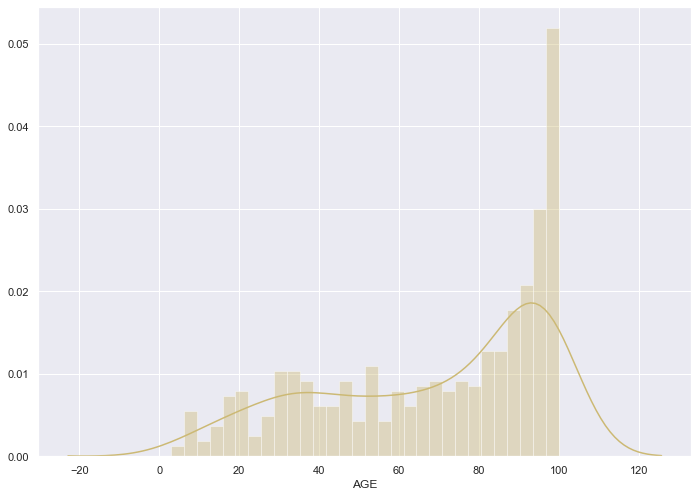

In [20]:
#Getting the info of the houses age
S = bostondf['AGE']


# Using pyplot to plot the distribution of the houses age

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(S, color="y", bins=30)
plt.show()

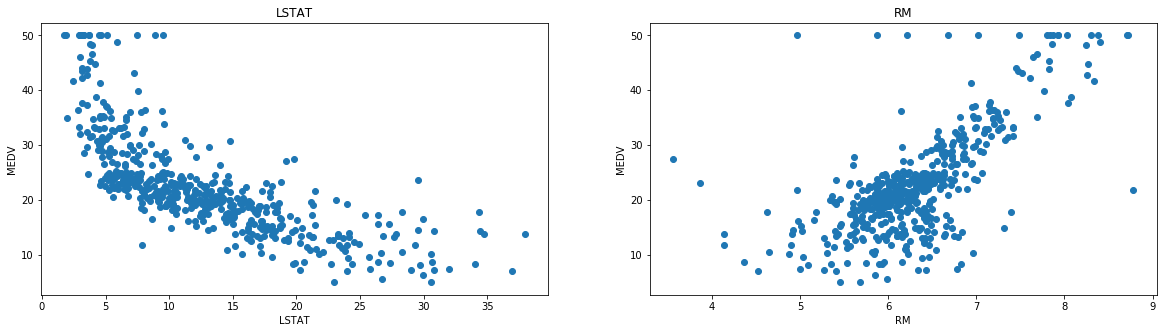

In [14]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

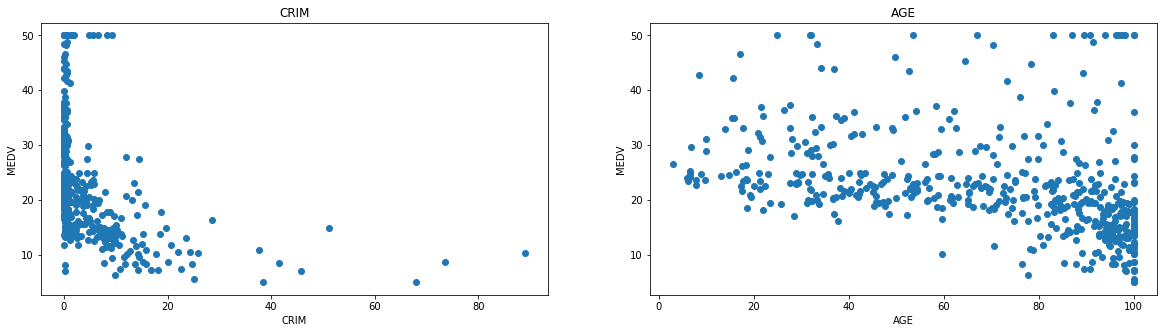

In [15]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['CRIM', 'AGE']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

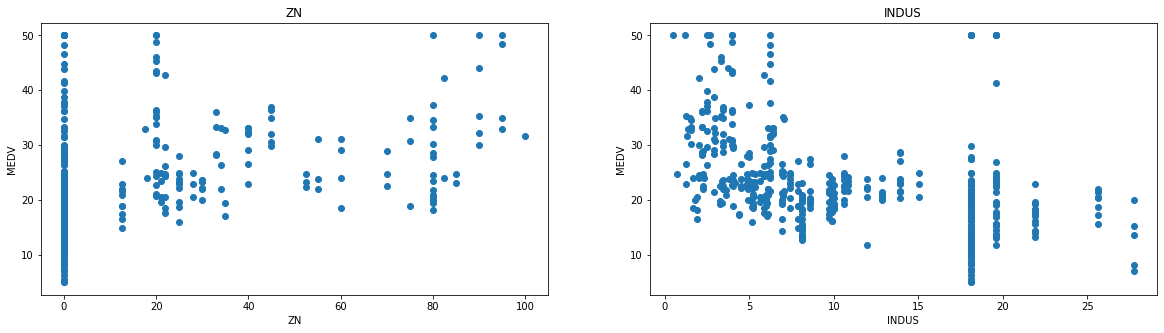

In [16]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['ZN', 'INDUS']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

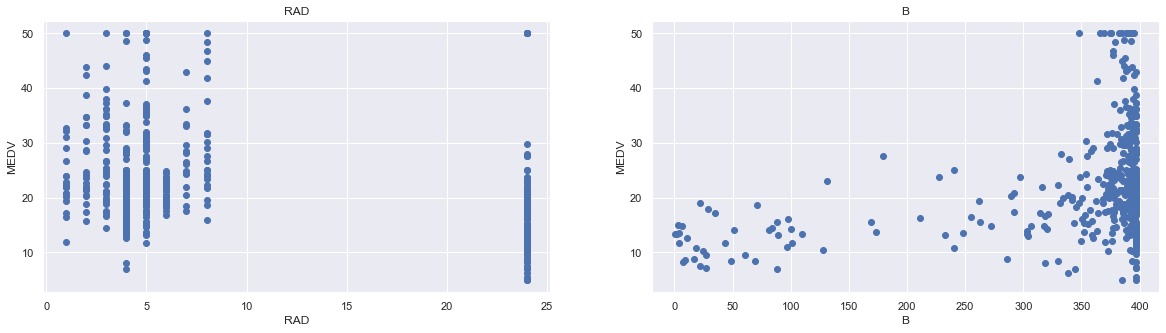

In [19]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['RAD', 'B']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

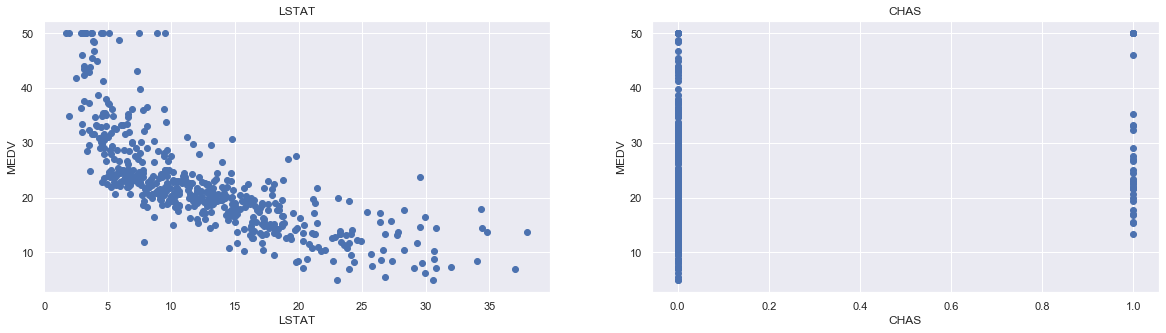

In [22]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting CHAS and MEDV no strong correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT','CHAS']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

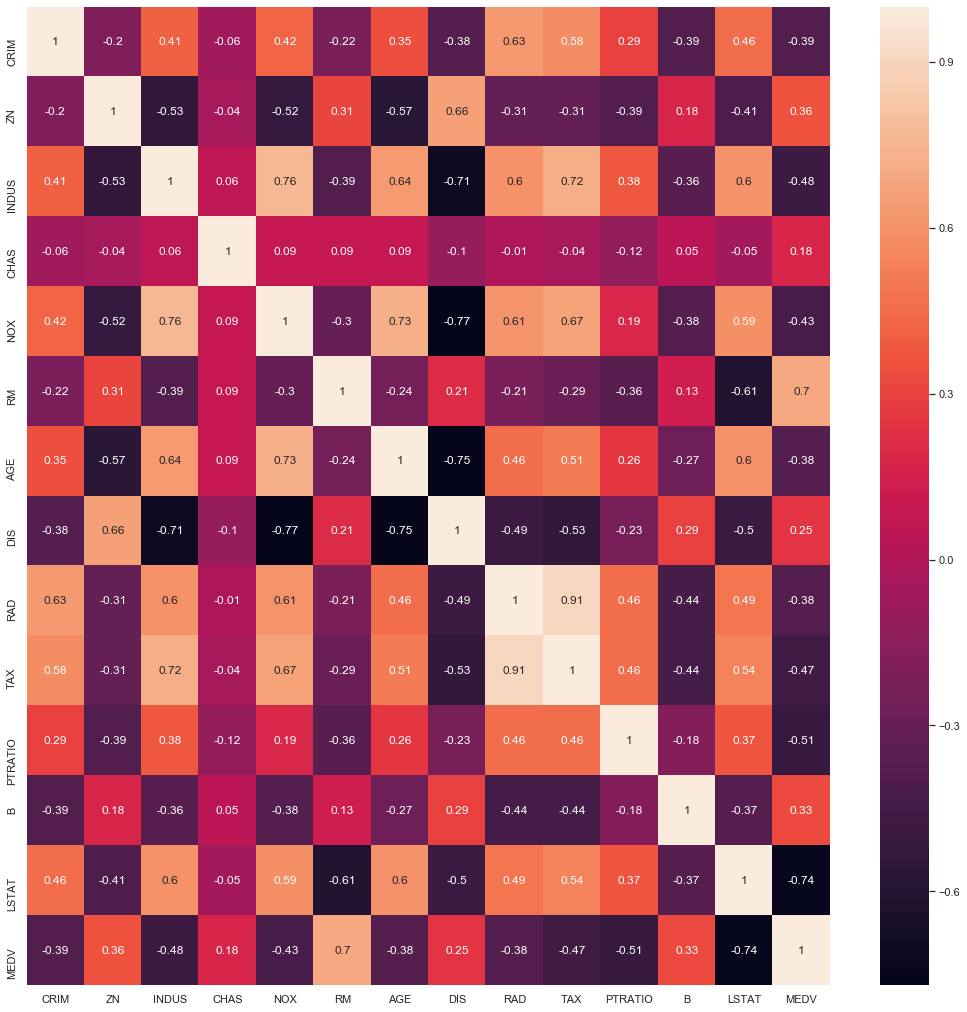

In [15]:
#code adapted from towardsdatascience.com
#show linear correlations between variables
plt.figure(figsize = (18,18))
correlation_matrix = bostondf.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Correlations
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

The Boston data set heatmap presents strong possitive correlation between the index of accessibility to radial highways (RAD) and the full-value property-tax rate per $10,000 (TAX). Furthermore, there is a possitive relationship between nitric oxides concentration (NOX) and proportion of non-retail business acres per town (INDUS).
Exists as well a positive correltion between Median value of owner-occupied homes in $1000's and average number of rooms per dwelling (RM).

On the other hand, there is strong negative correlations between weighted distances to five Boston employment centres (DIS) and nitric oxides concentration (parts per 10 million) (NOX). Also strong negative correlation between weighted distances to five Boston employment centres (DIS) and proportion of owner-occupied units built prior to 1940 (AGE). 
Moreover there is negative correlation between Median value of owner-occupied homes in $1000's (MEDV) and % lower status of the population (LSTAT).

Negative correlation as well between proportion of non-retail business acres per town (INDUS) and weighted distances to five Boston employment centres (DIS)

## Inferential statistics

Inferential statistics allows you to make predictions (“inferences”) from the data, while descriptive statistics describes data (for example, a chart or graph). With inferential statistics, you take data from samples and make generalizations about a population.

There are two main areas of inferential statistics:

Estimating parameters. This means taking a statistic from your sample data (for example the sample mean) and using it to say something about a population parameter (i.e. the population mean).
Hypothesis tests. This is where you can use sample data to answer research questions. 

Example of descriptive statistics:

Sample mean
Sample standard deviation
Making a bar chart or boxplot
Describing the shape of the sample probability distribution
dependent variable.
A bar graph is one way to summarize data in descriptive statistics. Source: NIH.GOV.




With inferential statistics a sample data from a small number of people is taken and and try to determine if the data can predict whether the drug will work for everyone (i.e. the population). There are various ways you can do this, from calculating a z-score (z-scores are a way to show where your data would lie in a normal distribution to post-hoc (advanced) testing.
hypothesis testing example
A hypothesis test can show where your data is placed on a distribution like this one.

Inferential statistics use statistical models to help you compare your sample data to other samples or to previous research. Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results.

Regression

In [23]:
River = bostondf['CHAS']
np.polyfit(River, price,1)


array([ 6.34615711, 22.09384289])

In [24]:
#identifying the correlation between the values and MEDV (price)
correlation_matrix = bostondf.corr().round(2)


price_correlation = correlation_matrix.iloc[:,13:14]

price_correlation

,MEDV
CRIM,-0.39
ZN,0.36
INDUS,-0.48
CHAS,0.18
NOX,-0.43
RM,0.70
AGE,-0.38
DIS,0.25
RAD,-0.38
TAX,-0.47


The correlation between MEDV (price of the house) and CHAS (if the house tract bounds river) is the lower correlation attending to the price variable. This shows that there is not a significant difference in median house prices between houses that are along the Charles river and those that aren’t. That variable has a very low correlation with price.

Analysis on regression methods and suitability to find the relationship between the median house price and whether the house borders the river.


T-tests
we could t-test that with the following null hypothesis if the houses close to the river. A starting point id showing if the data follows a normal distrbution with the following hypothesis:

H0: The price data are sampled from a normal distribution

H1: The price data are not sampled from a normal distribution.

And then test the same hypothesis for the river variable.

H0: The data are sampled from a normal distribution

H1: The data are not sampled from a normal distribution.

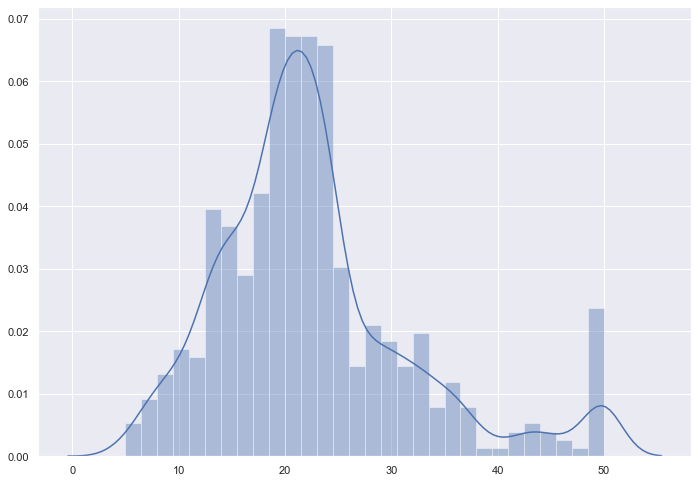

In [25]:
# Using pyplot to plot the prices
boston['MEDV'] = boston.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

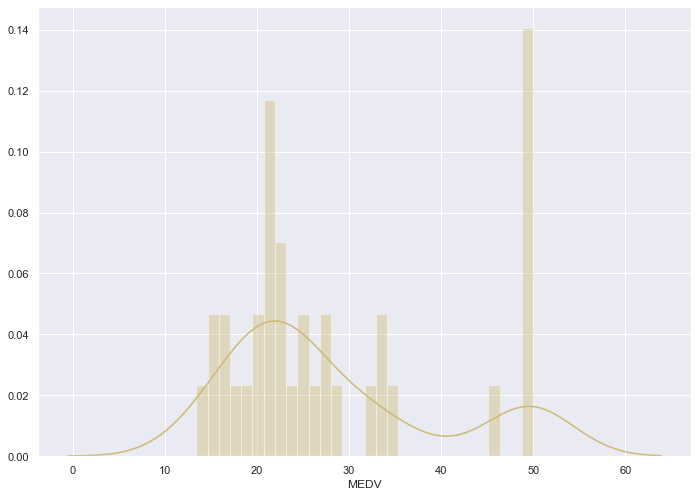

In [26]:
#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverYES, color="y", bins=30)
plt.show()

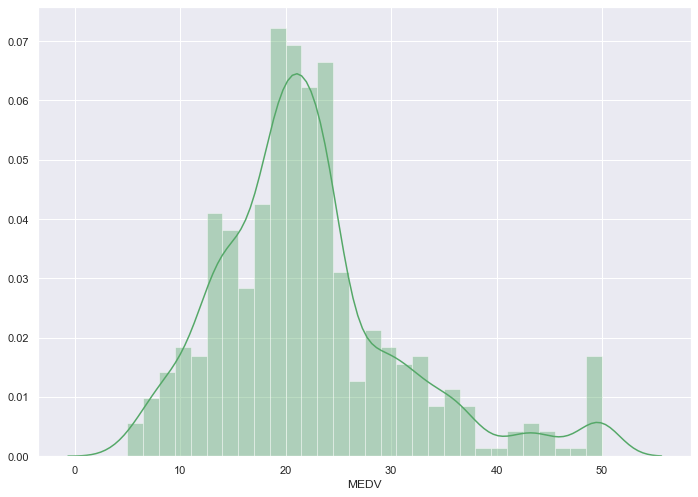

In [27]:
#Getting the info of the houses that face the river
RiverNO = bostondf[bostondf['CHAS']==0]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverNO, color="g", bins=30)
plt.show()

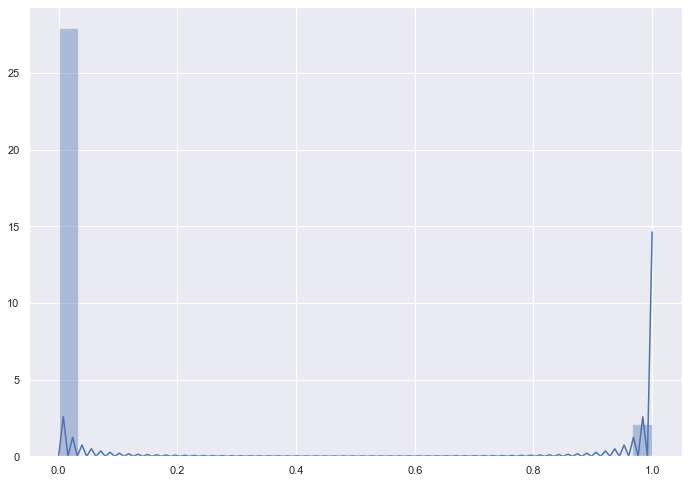

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bostondf.iloc[:,3:4], bins=30)
plt.show()

In [29]:
ss.ttest_ind(price, River)

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

The plots above show that the MEDV (Price) variable follows a normal distribution, while the second plot shows that the CHAS (houses in the river border) doesn't follow a normal distribution.

To be able to confirm or refect the nul hipothesis, a Saphiro test is going to be used to tests the null hypothesis that the data was drawn from a normal distribution.

In [30]:
ss.shapiro(price)

(0.9171748757362366, 4.940195786292171e-16)

In [31]:
ss.shapiro(River)

(0.27476072311401367, 2.350467979135232e-40)

One-way ANOVA compares levels (i.e. groups) of a single factor based on single continuous response variable. In this case price would be the continuous variable and CHAS (1 or 0) the factor (categorical).

To continue with the Price - CHAS analysis we are going to divide the data into CHAS 1 (houses in the river border) and CHAS 0 (houses not in the river border)

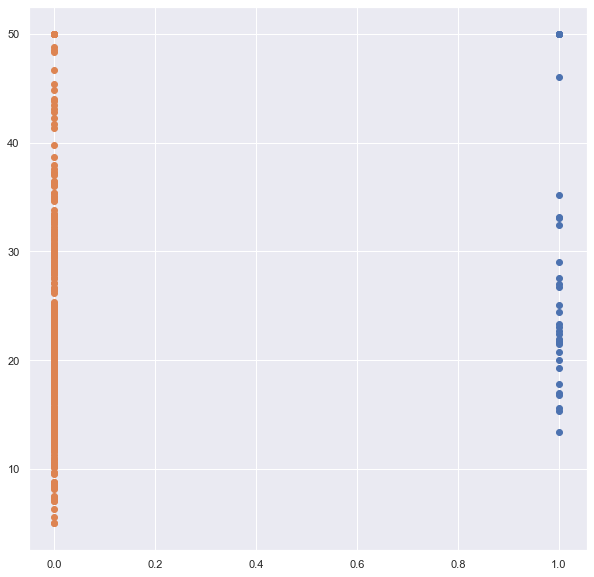

In [32]:
#Splitting the dataset between houses that face the river and those that don't

#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]
#Getting the info of the houses that doesn't face the river
RiverNO = bostondf[bostondf['CHAS']==0]

a = bostondf[bostondf['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
b = bostondf[bostondf ['CHAS']==1]['MEDV']
h = bostondf[bostondf ['CHAS']==1]['CHAS']
f = bostondf[bostondf['CHAS']==1][['CHAS', 'MEDV']]

c = bostondf[bostondf['CHAS']==0][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
d = bostondf[bostondf ['CHAS']==0]['MEDV']
i = bostondf[bostondf ['CHAS']==0]['CHAS']
g = bostondf[bostondf['CHAS']==0][['CHAS', 'MEDV']]

#scatter plot with values divided: Houses in the River in blue , houses not in the river in orange
plt.figure(figsize = (10,10))
plt.scatter(h,b)
plt.scatter(i,d)






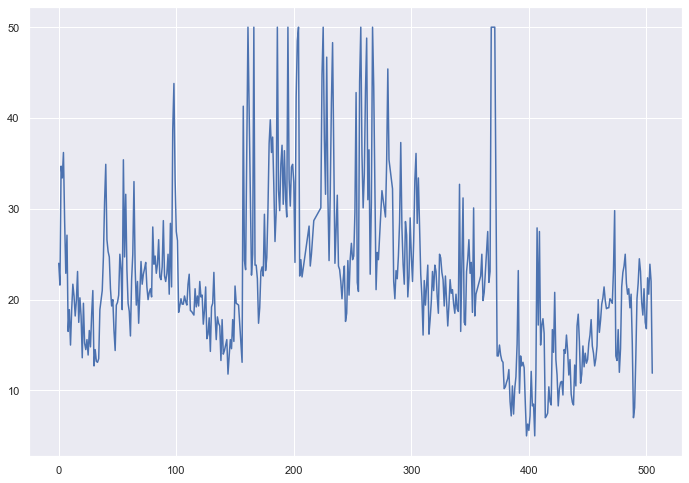

In [33]:
RiverYES = bostondf[bostondf['CHAS']==0]['MEDV']
plt.plot(RiverYES)

In [34]:
#houses facing the river mean
b.mean()

28.44

In [35]:
#houses not facing the river mean
d.mean()

22.093842887473482

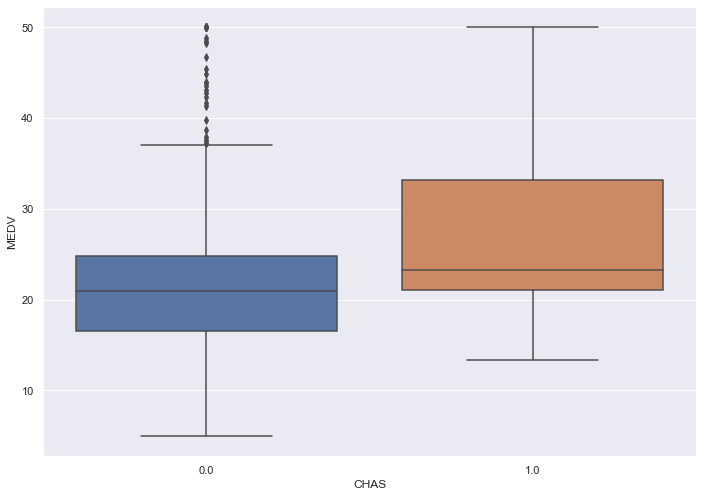

In [36]:
#representing river and no river values in the boxplot
sns.boxplot(x='CHAS', y='MEDV', data=bostondf)


As per the data dispalyed above regarding the mean and the quartiles represented in the box plots, the houses facing the river would most likely have a higher price than the houses not facing the river.

### Predict

## What are neural networks?


Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Neural networks help us cluster and classify. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on. 

Neural networks can also extract features that are fed to other algorithms for clustering and classification; so you can think of deep neural networks as components of larger machine-learning applications involving algorithms for reinforcement learning, classification and regression.)

References:
https://skymind.ai/wiki/neural-network

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

It is written in Python and supports multiple back-end neural network computation engines.

Keras was created to be user friendly, modular, easy to extend, and to work with Python. The API was “designed for human beings, not machines,”.

Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that can be combined to create new models. Models are defined in Python code, not separate model configuration files.

References: 
https://keras.io/
https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html

## Training a neural network

For the purpose of this first prediction, there is going to be a prediction on the LSTAT % lower status of the population and MEDV Price of the house variables as they are the variables that show a higher correlation, in this case a negative correlation.

We have started with a linear regression, with 5 layers of neurons and 30 epochs.
Let's try to increase the number of neurons per layer, eventhough we can see a logaritmic tendence in the data that wouldn't fit the linear line. The neural network in a few iterations stops learning and stops reducing the loss.

Let's change a linear for a sigmoid. It gets better and reduces the loss from the last trial. 

Let's change the optimizer to sgd. Not working (nan)

Adding an extra layer, linear. No effect.

ncreasing the neurons from 30 to 50 in the sigmoid. No effect

Changing a linear for a tanh. Much worst

Changing the first layer to sigmoid. No difference

Creating an extra sigmoid layer. a little worst

Creating another linear. no changes

trying softplus. not much worst, not much better

trying selu activation

changing sotfplus for linear

changing the second sigmoid for linear. Somehow better now 28 loss

changing epoch to 70 no much of a difference

changing batch size to 100. no difference, I can't reduce it more than 28

interchanges selu and sigmoid and much worst. 70 loss

leaving first sigmoid and then 5 linears it learns much quicker but after 10-12 iterations it stops learning

increasing the batch size from 100 to 400 much worst. ended in 78

changed to a batch size of 10 it went back to 28

changed sigmoid by softsign. same result around 28

changed sigmoid by elu. little bit worst. 30

changed elu neurons to 100. same

changed elu for sigmoid. same

augmented the number of neurons to 100 in each layer. same result





References: 
https://keras.io/getting-started/sequential-model-guide/
https://arxiv.org/abs/1706.02515
https://github.com/bioinf-jku/SNNs/blob/master/SelfNormalizingNetworks_CNN_CIFAR10.ipynb

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
506/506 [==============================] - 0s 814us/step - loss: 113.1274
Epoch 2/30
506/506 [==============================] - 0s 241us/step - loss: 34.2233
Epoch 3/30
506/506 [==============================] - 0s 256us/step - loss: 31.4014
Epoch 4/30
506/506 [==============================] - 0s 248us/step - loss: 34.5547
Epoch 5/30
506/506 [==============================] - 0s 225us/step - loss: 31.7679
Epoch 6/30
506/506 [==============================] - 0s 215us/step - loss: 31.0304
Epoch 7/30
506/506 [==============================] - 0s 249us/step - loss: 30.1322
Epoch 8/30
506/506 [==============================] - 0s 236us/step - loss: 30.5644
Epoch 9/30
506/506 [==============================] - 0s 272us/step - loss: 30.8124
Epoch 10/30
506/506 [==============================] - 0s 269us/step - loss: 32.7167
Epoch 11/30
506/506 [=================

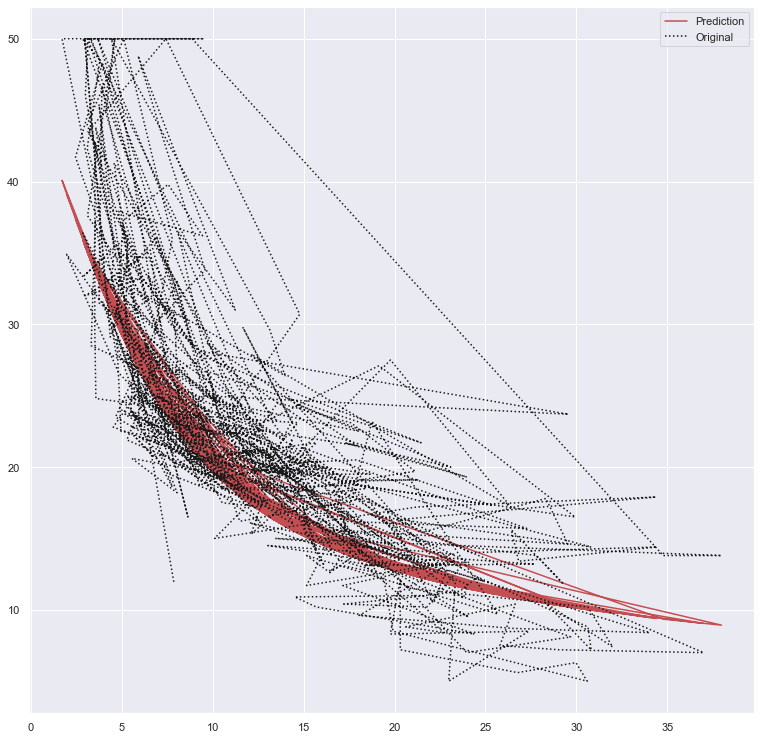

In [37]:
x = bostondf['LSTAT'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(100, input_dim=1, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=30, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.figure(figsize = (13,13))
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

For the purpose of this second prediction, we are going to try with a linear prediction to ses if we can get a better output. There is going to be a prediction on the RM Rooms in dweling and MEDV Price of the house variables as they are the variables that show a high correltation, in this case a positive correlation that resembles a linear relationship.

1 layer 1 neuron. high loss number 603
changed to 3 linear layers, first 2 with 10 neurons , third 1 neuron. Improved to 59

Epoch 1/15
506/506 [==============================] - 0s 509us/step - loss: 339.3231
Epoch 2/15
506/506 [==============================] - 0s 194us/step - loss: 139.1400
Epoch 3/15
506/506 [==============================] - 0s 176us/step - loss: 67.5033
Epoch 4/15
506/506 [==============================] - 0s 193us/step - loss: 59.8393
Epoch 5/15
506/506 [==============================] - 0s 159us/step - loss: 59.6698
Epoch 6/15
506/506 [==============================] - 0s 160us/step - loss: 59.6785
Epoch 7/15
506/506 [==============================] - 0s 158us/step - loss: 59.4909
Epoch 8/15
506/506 [==============================] - 0s 177us/step - loss: 59.4530
Epoch 9/15
506/506 [==============================] - 0s 267us/step - loss: 59.5414
Epoch 10/15
506/506 [==============================] - 0s 267us/step - loss: 59.3618
Epoch 11/15
506/506 [==============================] - 0s 252us/step - loss: 59.5990
Epoch 12/15
506/506 [==============================] - 0s 264us/step - l

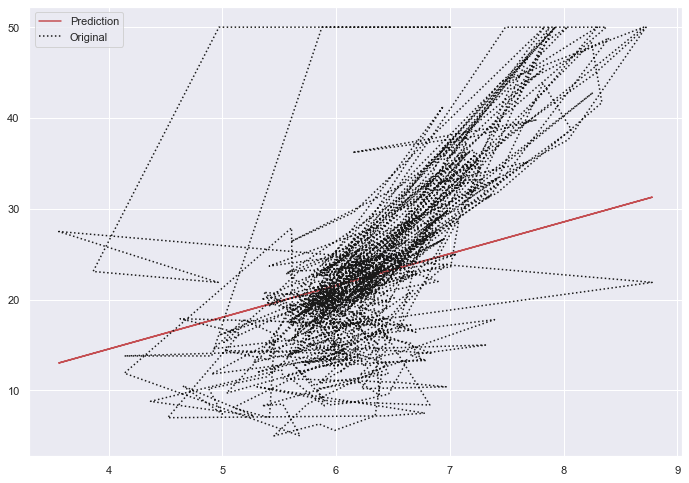

In [38]:
x = bostondf['RM'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=1, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=15, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

## Building the model

In [96]:
#from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

inputs = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output = bostondf['MEDV']


m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))

m.compile(loss="mean_squared_error", optimizer="adam")



### Activation methods


### Optimizers:
**Gradient descent** is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.

It works by having the model make predictions on training data and using the error on the predictions to update the model in such a way as to reduce the error.

Gradient descent can vary in terms of the number of training patterns used to calculate error; that is in turn used to update the model.

The number of patterns used to calculate the error includes how stable the gradient is that is used to update the model. We will see that there is a tension in gradient descent configurations of computational efficiency and the fidelity of the error gradient.

The three main flavors of gradient descent are batch, stochastic, and mini-batch.

**Stochastic gradient descent**, often abbreviated SGD, is a variation of the gradient descent algorithm that calculates the error and updates the model for each example in the training dataset.

**Batch gradient descent** is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

**Mini-batch gradient descent** is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.


References:
https://towardsdatascience.com/the-3-best-optimization-methods-in-neural-networks-40879c887873
https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/


## Split

In [97]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, output, test_size=0.2)

In [98]:
inputs_test.iloc[0]

CRIM         9.39063
ZN           0.00000
INDUS       18.10000
NOX          0.74000
RM           5.62700
AGE         93.90000
DIS          1.81720
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          396.90000
LSTAT       22.88000
CHAS         0.00000
Name: 439, dtype: float64

## Train

### Difference between epoch and Batch
**Epoch**
One cycle through the entire training dataset is called a training epoch.

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

**Batch**
The batch size is a number of samples processed before the model is updated.

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

In [104]:
# Train the neural network.
m.fit(inputs, output, epochs=600, batch_size=200)

Epoch 1/600
506/506 [==============================] - 0s 43us/step - loss: 34.9382
Epoch 2/600
506/506 [==============================] - 0s 41us/step - loss: 34.8002
Epoch 3/600
506/506 [==============================] - 0s 39us/step - loss: 34.4592
Epoch 4/600
506/506 [==============================] - 0s 35us/step - loss: 32.3123
Epoch 5/600
506/506 [==============================] - 0s 47us/step - loss: 32.9191
Epoch 6/600
506/506 [==============================] - 0s 38us/step - loss: 31.3870
Epoch 7/600
506/506 [==============================] - 0s 34us/step - loss: 31.4408
Epoch 8/600
506/506 [==============================] - 0s 37us/step - loss: 30.7787
Epoch 9/600
506/506 [==============================] - 0s 55us/step - loss: 30.7148
Epoch 10/600
506/506 [==============================] - 0s 52us/step - loss: 30.0176
Epoch 11/600
506/506 [==============================] - 0s 54us/step - loss: 30.1081
Epoch 12/600
506/506 [==============================] - 0s 58us/step - los

506/506 [==============================] - 0s 45us/step - loss: 6.9504
Epoch 194/600
506/506 [==============================] - 0s 64us/step - loss: 6.4285
Epoch 195/600
506/506 [==============================] - 0s 74us/step - loss: 6.5493
Epoch 196/600
506/506 [==============================] - 0s 47us/step - loss: 6.2649
Epoch 197/600
506/506 [==============================] - 0s 54us/step - loss: 6.7970
Epoch 198/600
506/506 [==============================] - 0s 48us/step - loss: 6.9344
Epoch 199/600
506/506 [==============================] - 0s 47us/step - loss: 7.2043
Epoch 200/600
506/506 [==============================] - 0s 55us/step - loss: 8.1721
Epoch 201/600
506/506 [==============================] - 0s 39us/step - loss: 7.0977
Epoch 202/600
506/506 [==============================] - 0s 43us/step - loss: 7.6769
Epoch 203/600
506/506 [==============================] - 0s 55us/step - loss: 7.6576
Epoch 204/600
506/506 [==============================] - 0s 47us/step - loss: 7

506/506 [==============================] - 0s 45us/step - loss: 4.7304
Epoch 386/600
506/506 [==============================] - 0s 41us/step - loss: 4.3286
Epoch 387/600
506/506 [==============================] - 0s 42us/step - loss: 4.9152
Epoch 388/600
506/506 [==============================] - 0s 53us/step - loss: 6.0139
Epoch 389/600
506/506 [==============================] - 0s 46us/step - loss: 4.8577
Epoch 390/600
506/506 [==============================] - 0s 47us/step - loss: 4.3357
Epoch 391/600
506/506 [==============================] - 0s 48us/step - loss: 4.0994
Epoch 392/600
506/506 [==============================] - 0s 47us/step - loss: 4.0241
Epoch 393/600
506/506 [==============================] - 0s 49us/step - loss: 3.9361
Epoch 394/600
506/506 [==============================] - 1s 2ms/step - loss: 4.0523
Epoch 395/600
506/506 [==============================] - 0s 60us/step - loss: 3.8920
Epoch 396/600
506/506 [==============================] - 0s 71us/step - loss: 3.

506/506 [==============================] - 0s 46us/step - loss: 3.1585
Epoch 578/600
506/506 [==============================] - 0s 51us/step - loss: 3.3723
Epoch 579/600
506/506 [==============================] - 0s 50us/step - loss: 3.4183
Epoch 580/600
506/506 [==============================] - 0s 55us/step - loss: 3.3088
Epoch 581/600
506/506 [==============================] - 0s 51us/step - loss: 3.5903
Epoch 582/600
506/506 [==============================] - 0s 44us/step - loss: 3.1263
Epoch 583/600
506/506 [==============================] - 0s 46us/step - loss: 3.2275
Epoch 584/600
506/506 [==============================] - 0s 56us/step - loss: 3.2761
Epoch 585/600
506/506 [==============================] - 0s 46us/step - loss: 3.6843
Epoch 586/600
506/506 [==============================] - 0s 43us/step - loss: 3.7370
Epoch 587/600
506/506 [==============================] - 0s 52us/step - loss: 3.5722
Epoch 588/600
506/506 [==============================] - 0s 51us/step - loss: 3

### Predict

In [105]:
#https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-and-iris.ipynb
m.predict(inputs_test.as_matrix()[0:1])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[12.028296]], dtype=float32)

In [107]:
# Have the network predict the prices of the houses test inputs.
predictions_test = m.predict(inputs_test)
predictions_test

array([[12.028299 ],
       [24.500088 ],
       [17.572294 ],
       [21.570175 ],
       [20.420559 ],
       [20.766785 ],
       [18.969564 ],
       [18.022005 ],
       [35.151344 ],
       [25.624542 ],
       [29.536053 ],
       [25.381329 ],
       [14.96498  ],
       [14.670063 ],
       [22.69776  ],
       [30.86905  ],
       [34.27351  ],
       [12.869482 ],
       [24.555088 ],
       [13.677217 ],
       [19.614437 ],
       [19.432634 ],
       [10.156496 ],
       [26.518858 ],
       [18.67572  ],
       [21.482119 ],
       [19.671206 ],
       [21.358093 ],
       [18.325792 ],
       [23.127972 ],
       [11.072668 ],
       [25.936804 ],
       [13.609284 ],
       [16.735273 ],
       [23.961372 ],
       [20.125473 ],
       [17.125088 ],
       [19.74255  ],
       [26.901928 ],
       [23.661478 ],
       [15.184341 ],
       [20.245413 ],
       [16.404383 ],
       [17.324213 ],
       [31.037    ],
       [14.57395  ],
       [12.63556  ],
       [20.48

### Evaluation

In [110]:
#Converting the ouputs test into an array
outputs_test.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([12.8, 29.8, 13.8, 21.4, 21.7, 22.2, 17.6, 15.3, 35.4, 23.7, 29. ,
       23.6, 14. , 14.9, 23.3, 31.6, 37. , 13.8, 23. , 14.1, 20.4, 21. ,
        9.5, 26.6, 18.6, 22. , 19.6, 20.7, 18.9, 22. , 10.9, 26.4, 15.4,
       14.3, 23.1, 23.8, 16.5, 19.3, 24. , 22.8, 12.6, 21.7, 16.3, 18.3,
       30.8, 17.2, 11.7, 20.1, 20.3, 15.6, 36.4,  5. , 50. , 27.9, 16.7,
       23.7, 37.2, 13.6, 31.1, 21.2, 30.3, 29.1,  5.6, 28.6, 50. , 25. ,
       16.8, 25. , 19.9, 20.8, 22.5, 13.9, 36.2, 14.3, 21. , 18.8, 26.6,
       16.7, 41.7, 24.1, 12. , 13.1, 13.4, 30.5, 18.6, 18.5, 27.5, 18. ,
       22.9, 33.1, 26.5,  8.1, 21.9, 50. , 19. , 19.3, 50. , 11.9, 14.2,
       29.6, 15. , 19.6])

In [114]:
#difference between the outputs prediction and the test outputs
m.predict(inputs_test).T - outputs_test.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-0.77170067, -5.29991226,  3.77229424,  0.17017517, -1.27944107,
        -1.43321533,  1.36956444,  2.72200508, -0.2486557 ,  1.92454224,
         0.5360527 ,  1.78132858,  0.96498013, -0.22993698, -0.60224037,
        -0.73095093, -2.72649002, -0.93051796,  1.55508804, -0.42278347,
        -0.7855629 , -1.56736565,  0.65649605, -0.08114204,  0.07572021,
        -0.51788139,  0.07120552,  0.65809326, -0.57420769,  1.12797165,
         0.17266808, -0.46319618, -1.7907156 ,  2.43527336,  0.86137238,
        -3.67452698,  0.62508774,  0.4425499 ,  2.90192795,  0.86147804,
         2.58434143, -1.45458717,  0.10438271, -0.97578697,  0.23700066,
        -2.62605019,  0.93556004,  0.38942375,  1.47213478,  0.70911255,
         1.26279602, -0.30806208,  2.34814835,  0.61893425, -1.14395351,
         0.44073181,  3.02217178,  0.3560051 ,  0.61382141, -0.15862579,
        -4.2647541 ,  0.23909035,  4.07382336, -4.11323891, -0.95497131,
        -0.09286499,  3.96896858, -0.30948448, -2.0

In [112]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs_test).T - outputs_test.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


24.880490970611543

## Preprocessing the data

### Standarization of the data

Meaning

In [130]:
#pre-procesing by standarizing

inputs_st = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output_st = bostondf['MEDV']

#scaler
scaler = pre.StandardScaler()
scaler.fit(inputs_st)
scaler.mean_, scaler.scale_
st_scale_in = pd.DataFrame(scaler.transform(inputs_st), columns=inputs_st.columns)



# Split the inputs and outputs into training and test sets.
inputs_train_st, inputs_test_st, outputs_train_st, outputs_test_st = mod.train_test_split(st_scale_in, output_st, test_size=0.2)


#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="linear"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(st_scale_in, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 1s 2ms/step - loss: 563.9843
Epoch 2/400
506/506 [==============================] - 0s 70us/step - loss: 455.7494
Epoch 3/400
506/506 [==============================] - 0s 68us/step - loss: 267.4025
Epoch 4/400
506/506 [==============================] - 0s 78us/step - loss: 130.4630
Epoch 5/400
506/506 [==============================] - 0s 75us/step - loss: 68.4231
Epoch 6/400
506/506 [==============================] - 0s 69us/step - loss: 35.4089
Epoch 7/400
506/506 [==============================] - 0s 68us/step - loss: 28.7900
Epoch 8/400
506/506 [==============================] - 0s 62us/step - loss: 22.7988
Epoch 9/400
506/506 [==============================] - 0s 65us/step - loss: 19.2498
Epoch 10/400
506/506 [==============================] - 0s 64us/step - loss: 17.4302
Epoch 11/400
506/506 [==============================] - 0s 65us/step - loss: 15.7447
Epoch 12/400
506/506 [==============================] - 0s 65us/step - 

506/506 [==============================] - 0s 75us/step - loss: 1.4843
Epoch 195/400
506/506 [==============================] - 0s 82us/step - loss: 1.5869
Epoch 196/400
506/506 [==============================] - 0s 85us/step - loss: 1.4324
Epoch 197/400
506/506 [==============================] - 0s 69us/step - loss: 1.3836
Epoch 198/400
506/506 [==============================] - 0s 63us/step - loss: 1.4200
Epoch 199/400
506/506 [==============================] - 0s 69us/step - loss: 1.3965
Epoch 200/400
506/506 [==============================] - 0s 74us/step - loss: 1.6545
Epoch 201/400
506/506 [==============================] - 0s 79us/step - loss: 1.8303
Epoch 202/400
506/506 [==============================] - 0s 74us/step - loss: 1.9051
Epoch 203/400
506/506 [==============================] - 0s 91us/step - loss: 1.7084
Epoch 204/400
506/506 [==============================] - 0s 89us/step - loss: 1.6184
Epoch 205/400
506/506 [==============================] - 0s 104us/step - loss: 

506/506 [==============================] - 0s 58us/step - loss: 0.6571
Epoch 387/400
506/506 [==============================] - 0s 69us/step - loss: 0.6578
Epoch 388/400
506/506 [==============================] - 0s 69us/step - loss: 0.6776
Epoch 389/400
506/506 [==============================] - 0s 69us/step - loss: 0.6119
Epoch 390/400
506/506 [==============================] - 0s 65us/step - loss: 0.7174
Epoch 391/400
506/506 [==============================] - 0s 65us/step - loss: 0.6269
Epoch 392/400
506/506 [==============================] - 0s 68us/step - loss: 0.5750
Epoch 393/400
506/506 [==============================] - 0s 64us/step - loss: 0.5476
Epoch 394/400
506/506 [==============================] - 0s 60us/step - loss: 0.5724
Epoch 395/400
506/506 [==============================] - 0s 65us/step - loss: 0.5899
Epoch 396/400
506/506 [==============================] - 0s 66us/step - loss: 0.6494
Epoch 397/400
506/506 [==============================] - 0s 65us/step - loss: 0

In [135]:
# Have the network predict the prices of the houses test inputs standarized.
predictions_test_st = m.predict(inputs_test_st)
predictions_test_st


array([[14.850229 ],
       [11.564322 ],
       [30.1911   ],
       [24.485104 ],
       [14.165703 ],
       [10.477365 ],
       [23.193571 ],
       [37.557487 ],
       [19.226254 ],
       [33.53221  ],
       [17.826014 ],
       [32.67272  ],
       [21.39319  ],
       [23.11976  ],
       [41.31793  ],
       [30.766071 ],
       [23.22104  ],
       [14.114178 ],
       [19.097303 ],
       [19.497183 ],
       [23.189955 ],
       [17.591112 ],
       [23.356083 ],
       [51.20044  ],
       [17.173237 ],
       [14.008536 ],
       [ 8.48702  ],
       [20.017315 ],
       [13.460048 ],
       [12.817956 ],
       [18.559797 ],
       [21.164804 ],
       [23.328325 ],
       [23.220758 ],
       [18.782984 ],
       [18.831562 ],
       [19.183023 ],
       [23.043158 ],
       [23.8649   ],
       [24.715508 ],
       [22.627644 ],
       [20.546175 ],
       [ 5.098006 ],
       [11.274056 ],
       [29.133259 ],
       [22.96706  ],
       [18.866098 ],
       [23.72

In [132]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs_test_st).T - outputs_test_st.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


16.505535507202154

In [133]:
m.predict(inputs_test_st).T - outputs_test_st.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-3.49770737e-01,  6.43224716e-02,  9.10991669e-02,
         4.85103607e-01,  3.65702820e-01,  7.73645401e-02,
        -6.42890930e-03, -3.42512512e-01, -3.73746490e-01,
         1.32211304e-01,  2.60135651e-02,  1.57272186e+00,
        -1.50680962e+00,  9.19760513e-01,  1.51792831e+00,
         2.66071320e-01,  3.21040726e-01,  2.14177704e-01,
         1.97303391e-01, -2.81715393e-03,  8.99547577e-02,
        -2.08887863e-01,  3.56082916e-01,  1.20043945e+00,
        -2.26763153e-01,  2.08536339e-01,  8.70195389e-02,
         1.17314911e-01, -3.39952278e-01, -2.82044029e-01,
         5.97972870e-02, -2.35195541e-01, -4.71674728e-01,
        -7.92415619e-02,  2.82983780e-01,  1.31562042e-01,
        -1.69765472e-02,  2.43157578e-01,  7.64900589e-01,
        -8.44924927e-02, -3.72356415e-01,  2.46175003e-01,
         9.80057716e-02, -2.59435654e-02,  4.33258820e-01,
         1.26706009e+00,  1.66098404e-01, -1.75257111e-01,
        -3.11557770e-02,  1.28815842e-01, -4.11883163e-0

### Whitening
meaning

In [142]:
#whitening the dataset

inputs_w = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output_w = bostondf['MEDV']


pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs_w)
white = pd.DataFrame(pca.transform(inputs_w), columns=inputs_w.columns)

# Split the inputs and outputs into training and test sets.
inputs_train_w, inputs_test_w, outputs_train_w, outputs_test_w = mod.train_test_split(white, output_w, test_size=0.2)


#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(white, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 1s 2ms/step - loss: 567.4930
Epoch 2/400
506/506 [==============================] - 0s 73us/step - loss: 473.5752
Epoch 3/400
506/506 [==============================] - 0s 69us/step - loss: 274.8377
Epoch 4/400
506/506 [==============================] - 0s 77us/step - loss: 135.4719
Epoch 5/400
506/506 [==============================] - 0s 83us/step - loss: 93.4542
Epoch 6/400
506/506 [==============================] - 0s 77us/step - loss: 60.3442
Epoch 7/400
506/506 [==============================] - 0s 80us/step - loss: 40.8246
Epoch 8/400
506/506 [==============================] - 0s 73us/step - loss: 31.5652
Epoch 9/400
506/506 [==============================] - 0s 73us/step - loss: 25.9317
Epoch 10/400
506/506 [==============================] - 0s 76us/step - loss: 22.2980
Epoch 11/400
506/506 [==============================] - 0s 75us/step - loss: 20.5392
Epoch 12/400
506/506 [==============================] - 0s 82us/step - 

506/506 [==============================] - 0s 80us/step - loss: 0.5419
Epoch 195/400
506/506 [==============================] - 0s 80us/step - loss: 0.5650
Epoch 196/400
506/506 [==============================] - 0s 83us/step - loss: 0.5736
Epoch 197/400
506/506 [==============================] - 0s 76us/step - loss: 0.5114
Epoch 198/400
506/506 [==============================] - 0s 82us/step - loss: 0.4614
Epoch 199/400
506/506 [==============================] - 0s 73us/step - loss: 0.4279
Epoch 200/400
506/506 [==============================] - 0s 76us/step - loss: 0.4288
Epoch 201/400
506/506 [==============================] - 0s 80us/step - loss: 0.3921
Epoch 202/400
506/506 [==============================] - 0s 84us/step - loss: 0.4105
Epoch 203/400
506/506 [==============================] - 0s 81us/step - loss: 0.4291
Epoch 204/400
506/506 [==============================] - 0s 73us/step - loss: 0.4240
Epoch 205/400
506/506 [==============================] - 0s 64us/step - loss: 0

506/506 [==============================] - 0s 83us/step - loss: 0.2062
Epoch 387/400
506/506 [==============================] - 0s 76us/step - loss: 0.1816
Epoch 388/400
506/506 [==============================] - 0s 76us/step - loss: 0.2174
Epoch 389/400
506/506 [==============================] - 0s 83us/step - loss: 0.2153
Epoch 390/400
506/506 [==============================] - 0s 80us/step - loss: 0.2165
Epoch 391/400
506/506 [==============================] - 0s 67us/step - loss: 0.1918
Epoch 392/400
506/506 [==============================] - 0s 77us/step - loss: 0.1791
Epoch 393/400
506/506 [==============================] - 0s 87us/step - loss: 0.1543
Epoch 394/400
506/506 [==============================] - 0s 87us/step - loss: 0.1468
Epoch 395/400
506/506 [==============================] - 0s 78us/step - loss: 0.1476
Epoch 396/400
506/506 [==============================] - 0s 84us/step - loss: 0.1438
Epoch 397/400
506/506 [==============================] - 0s 79us/step - loss: 0

In [146]:
white.corr().round()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
ZN,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
NOX,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
RM,0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
AGE,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
DIS,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
RAD,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,-0.0
PTRATIO,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0


In [143]:
# Have the network predict the prices of the houses test inputs whitened.
predictions_test_w = m.predict(inputs_test_w)
predictions_test_w

array([[13.739781],
       [19.119057],
       [21.536156],
       [19.372292],
       [33.92273 ],
       [14.497957],
       [11.514746],
       [11.931362],
       [18.612003],
       [11.484013],
       [29.402054],
       [28.053835],
       [14.978954],
       [23.764791],
       [23.117376],
       [15.598723],
       [ 7.933308],
       [15.859773],
       [28.64205 ],
       [16.391882],
       [23.265059],
       [14.018439],
       [20.259245],
       [ 8.591825],
       [ 7.458241],
       [21.804792],
       [17.563047],
       [10.738981],
       [28.727678],
       [32.415543],
       [11.376442],
       [25.291075],
       [23.854109],
       [36.611076],
       [15.730589],
       [19.86289 ],
       [25.023119],
       [15.331837],
       [15.470579],
       [42.473103],
       [24.513021],
       [22.94631 ],
       [13.269953],
       [46.880234],
       [18.54616 ],
       [43.953224],
       [16.028524],
       [11.499342],
       [24.295732],
       [15.253258],


In [144]:
np.sqrt(np.sum(m.predict(inputs_test_w).T - outputs_test_w.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


16.77809991836548

In [145]:
m.predict(inputs_test_w).T - outputs_test_w.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-6.02186203e-02,  2.19056702e-01, -1.63844299e-01,
        -1.27708435e-01,  6.22729492e-01,  6.97957230e-01,
        -5.85254288e-01, -6.86378479e-02,  1.20033264e-02,
        -2.15987396e-01,  4.02053833e-01,  1.53834915e-01,
        -2.10456848e-02,  6.47914886e-02,  1.17376328e-01,
         1.98723412e-01,  7.33308125e-01,  2.59772682e-01,
        -5.79502106e-02, -8.11805725e-03,  6.65058517e-01,
         2.18439293e-01,  1.59244919e-01, -1.08175468e-01,
        -4.17590141e-02,  4.79240417e-03,  1.63047409e-01,
         3.38981247e-01,  5.27678299e-01,  4.15542603e-01,
         7.64419556e-02, -8.92524719e-03,  1.54108810e-01,
         1.11076355e-01,  1.30588913e-01,  5.62890244e-01,
         2.23118973e-01,  1.31836700e-01, -2.29420853e-01,
        -6.26897430e-01,  1.13021469e-01,  1.46310043e-01,
         6.99527740e-02,  1.80233765e-01,  1.46159744e-01,
         4.53224182e-01, -1.71475601e-01, -6.58035278e-04,
         1.95732498e-01,  2.53257751e-01,  1.78356171e-0

## End

In [ ]:
#pre-procesing

inputs = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]
output = bostondf['MEDV']

x = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]

#scaler
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)

#scaler function for new data
#scaler.transform(np.array([[1.0, 0.5, 10.0, 4.1]]))



#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(xscale, output, epochs=400, batch_size=64)


In [64]:
np.around(m.predict(inputs))

array([[30.],
       [20.],
       [28.],
       [33.],
       [31.],
       [29.],
       [21.],
       [19.],
       [16.],
       [19.],
       [19.],
       [20.],
       [21.],
       [22.],
       [19.],
       [22.],
       [23.],
       [19.],
       [18.],
       [21.],
       [14.],
       [18.],
       [18.],
       [16.],
       [17.],
       [14.],
       [17.],
       [14.],
       [18.],
       [18.],
       [14.],
       [16.],
       [13.],
       [14.],
       [13.],
       [22.],
       [21.],
       [24.],
       [24.],
       [30.],
       [34.],
       [25.],
       [24.],
       [23.],
       [21.],
       [20.],
       [20.],
       [17.],
       [15.],
       [20.],
       [19.],
       [23.],
       [24.],
       [23.],
       [19.],
       [34.],
       [23.],
       [33.],
       [23.],
       [23.],
       [20.],
       [17.],
       [22.],
       [23.],
       [31.],
       [26.],
       [20.],
       [23.],
       [21.],
       [21.],
       [24.],
      

In [65]:
output.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [66]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs).T - output.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


100.75069484710694

In [73]:
#from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

inputs = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]
output = bostondf['MEDV']


m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(10, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(inputs, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 1s 1ms/step - loss: 452.1588
Epoch 2/400
506/506 [==============================] - 0s 54us/step - loss: 390.8043
Epoch 3/400
506/506 [==============================] - 0s 39us/step - loss: 331.7442
Epoch 4/400
506/506 [==============================] - 0s 43us/step - loss: 275.1881
Epoch 5/400
506/506 [==============================] - 0s 45us/step - loss: 223.5072
Epoch 6/400
506/506 [==============================] - 0s 41us/step - loss: 185.6712
Epoch 7/400
506/506 [==============================] - 0s 49us/step - loss: 163.0239
Epoch 8/400
506/506 [==============================] - 0s 41us/step - loss: 148.9201
Epoch 9/400
506/506 [==============================] - 0s 36us/step - loss: 137.8267
Epoch 10/400
506/506 [==============================] - 0s 46us/step - loss: 128.2911
Epoch 11/400
506/506 [==============================] - 0s 56us/step - loss: 119.7334
Epoch 12/400
506/506 [==============================] - 0s 46us/

506/506 [==============================] - 0s 51us/step - loss: 19.0998
Epoch 193/400
506/506 [==============================] - 0s 43us/step - loss: 18.7657
Epoch 194/400
506/506 [==============================] - 0s 44us/step - loss: 18.8299
Epoch 195/400
506/506 [==============================] - 0s 48us/step - loss: 18.7442
Epoch 196/400
506/506 [==============================] - 0s 55us/step - loss: 18.7961
Epoch 197/400
506/506 [==============================] - 0s 46us/step - loss: 18.7306
Epoch 198/400
506/506 [==============================] - 0s 34us/step - loss: 18.8617
Epoch 199/400
506/506 [==============================] - 0s 47us/step - loss: 18.7738
Epoch 200/400
506/506 [==============================] - 0s 41us/step - loss: 18.7669
Epoch 201/400
506/506 [==============================] - 0s 46us/step - loss: 18.7464
Epoch 202/400
506/506 [==============================] - 0s 49us/step - loss: 18.7106
Epoch 203/400
506/506 [==============================] - 0s 50us/ste

506/506 [==============================] - 0s 38us/step - loss: 18.1871
Epoch 383/400
506/506 [==============================] - 0s 50us/step - loss: 18.0885
Epoch 384/400
506/506 [==============================] - 0s 39us/step - loss: 18.2040
Epoch 385/400
506/506 [==============================] - 0s 46us/step - loss: 18.5004
Epoch 386/400
506/506 [==============================] - 0s 46us/step - loss: 18.3224
Epoch 387/400
506/506 [==============================] - 0s 41us/step - loss: 18.1234
Epoch 388/400
506/506 [==============================] - 0s 48us/step - loss: 18.2491
Epoch 389/400
506/506 [==============================] - 0s 42us/step - loss: 18.2106
Epoch 390/400
506/506 [==============================] - 0s 45us/step - loss: 18.1367
Epoch 391/400
506/506 [==============================] - 0s 41us/step - loss: 18.1907
Epoch 392/400
506/506 [==============================] - 0s 45us/step - loss: 18.1859
Epoch 393/400
506/506 [==============================] - 0s 39us/ste

In [74]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs).T - output.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


124.73858795166012

### Preprocessing
When trying the techniques of pre-procesing standarisation and whitening found that both make it easier for the neural network to learn, but the mean squared error gives not consistant numbers.

In [86]:
#pre-procesing

inputs = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]
output = bostondf['MEDV']

x = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]

#scaler
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)

#scaler function for new data
#scaler.transform(np.array([[1.0, 0.5, 10.0, 4.1]]))



#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(xscale, output, epochs=400, batch_size=64)







Epoch 1/400
506/506 [==============================] - 1s 1ms/step - loss: 570.7351
Epoch 2/400
506/506 [==============================] - 0s 56us/step - loss: 501.3951
Epoch 3/400
506/506 [==============================] - 0s 60us/step - loss: 354.3048
Epoch 4/400
506/506 [==============================] - 0s 67us/step - loss: 146.6551
Epoch 5/400
506/506 [==============================] - 0s 73us/step - loss: 88.9698
Epoch 6/400
506/506 [==============================] - 0s 69us/step - loss: 47.3941
Epoch 7/400
506/506 [==============================] - 0s 64us/step - loss: 38.1609
Epoch 8/400
506/506 [==============================] - 0s 72us/step - loss: 34.2811
Epoch 9/400
506/506 [==============================] - 0s 63us/step - loss: 30.8901
Epoch 10/400
506/506 [==============================] - 0s 67us/step - loss: 28.6925
Epoch 11/400
506/506 [==============================] - 0s 67us/step - loss: 26.5203
Epoch 12/400
506/506 [==============================] - 0s 70us/step - 

506/506 [==============================] - 0s 51us/step - loss: 6.6750
Epoch 194/400
506/506 [==============================] - 0s 53us/step - loss: 6.9142
Epoch 195/400
506/506 [==============================] - 0s 57us/step - loss: 6.7027
Epoch 196/400
506/506 [==============================] - 0s 57us/step - loss: 6.8592
Epoch 197/400
506/506 [==============================] - 0s 55us/step - loss: 6.9661
Epoch 198/400
506/506 [==============================] - 0s 59us/step - loss: 7.3842
Epoch 199/400
506/506 [==============================] - 0s 52us/step - loss: 7.2503
Epoch 200/400
506/506 [==============================] - 0s 58us/step - loss: 7.3523
Epoch 201/400
506/506 [==============================] - 0s 54us/step - loss: 7.8961
Epoch 202/400
506/506 [==============================] - 0s 56us/step - loss: 7.6344
Epoch 203/400
506/506 [==============================] - 0s 54us/step - loss: 8.0700
Epoch 204/400
506/506 [==============================] - 0s 55us/step - loss: 7

506/506 [==============================] - 0s 51us/step - loss: 5.1682
Epoch 386/400
506/506 [==============================] - 0s 53us/step - loss: 4.6238
Epoch 387/400
506/506 [==============================] - 0s 55us/step - loss: 4.8050
Epoch 388/400
506/506 [==============================] - 0s 55us/step - loss: 4.6005
Epoch 389/400
506/506 [==============================] - 0s 54us/step - loss: 5.0347
Epoch 390/400
506/506 [==============================] - 0s 52us/step - loss: 5.0212
Epoch 391/400
506/506 [==============================] - 0s 54us/step - loss: 5.1898
Epoch 392/400
506/506 [==============================] - 0s 58us/step - loss: 5.2672
Epoch 393/400
506/506 [==============================] - 0s 52us/step - loss: 4.7466
Epoch 394/400
506/506 [==============================] - 0s 56us/step - loss: 4.7234
Epoch 395/400
506/506 [==============================] - 0s 54us/step - loss: 4.6469
Epoch 396/400
506/506 [==============================] - 0s 54us/step - loss: 4

In [87]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(xscale).T - output.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


61.554761028289775

In [94]:
#whitening the dataset (no major)
pca = dec.PCA(n_components=4, whiten=True)
pca.fit(x)
xwhite = pd.DataFrame(pca.transform(x), columns=x.columns)


#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=4, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(xwhite, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 1s 2ms/step - loss: 576.1199
Epoch 2/400
506/506 [==============================] - 0s 66us/step - loss: 520.3198
Epoch 3/400
506/506 [==============================] - 0s 61us/step - loss: 398.1869
Epoch 4/400
506/506 [==============================] - 0s 61us/step - loss: 205.1212
Epoch 5/400
506/506 [==============================] - 0s 61us/step - loss: 100.4683
Epoch 6/400
506/506 [==============================] - 0s 68us/step - loss: 62.7798
Epoch 7/400
506/506 [==============================] - 0s 58us/step - loss: 48.7377
Epoch 8/400
506/506 [==============================] - 0s 58us/step - loss: 38.4522
Epoch 9/400
506/506 [==============================] - 0s 59us/step - loss: 36.2830
Epoch 10/400
506/506 [==============================] - 0s 71us/step - loss: 33.1085
Epoch 11/400
506/506 [==============================] - 0s 67us/step - loss: 30.2135
Epoch 12/400
506/506 [==============================] - 0s 64us/step -

506/506 [==============================] - 0s 65us/step - loss: 6.7586
Epoch 193/400
506/506 [==============================] - 0s 73us/step - loss: 6.5908
Epoch 194/400
506/506 [==============================] - 0s 66us/step - loss: 6.4661
Epoch 195/400
506/506 [==============================] - 0s 68us/step - loss: 6.5674
Epoch 196/400
506/506 [==============================] - 0s 67us/step - loss: 6.2976
Epoch 197/400
506/506 [==============================] - 0s 68us/step - loss: 6.5994
Epoch 198/400
506/506 [==============================] - 0s 66us/step - loss: 6.5769
Epoch 199/400
506/506 [==============================] - 0s 65us/step - loss: 6.4818
Epoch 200/400
506/506 [==============================] - 0s 68us/step - loss: 6.6114
Epoch 201/400
506/506 [==============================] - 0s 66us/step - loss: 6.2806
Epoch 202/400
506/506 [==============================] - 0s 63us/step - loss: 6.4329
Epoch 203/400
506/506 [==============================] - 0s 63us/step - loss: 6

506/506 [==============================] - 0s 59us/step - loss: 4.0267
Epoch 385/400
506/506 [==============================] - 0s 53us/step - loss: 4.2100
Epoch 386/400
506/506 [==============================] - 0s 58us/step - loss: 4.1163
Epoch 387/400
506/506 [==============================] - 0s 60us/step - loss: 3.9120
Epoch 388/400
506/506 [==============================] - 0s 65us/step - loss: 3.9934
Epoch 389/400
506/506 [==============================] - 0s 61us/step - loss: 3.9972
Epoch 390/400
506/506 [==============================] - 0s 64us/step - loss: 4.0609
Epoch 391/400
506/506 [==============================] - 0s 61us/step - loss: 4.1658
Epoch 392/400
506/506 [==============================] - 0s 68us/step - loss: 4.0812
Epoch 393/400
506/506 [==============================] - 0s 88us/step - loss: 4.1114
Epoch 394/400
506/506 [==============================] - 0s 87us/step - loss: 4.1312
Epoch 395/400
506/506 [==============================] - 0s 86us/step - loss: 4

In [52]:
xwhite.corr().round()

,CRIM,LSTAT,RM,DIS
CRIM,1.0,-0.0,-0.0,0.0
LSTAT,-0.0,1.0,0.0,-0.0
RM,-0.0,0.0,1.0,0.0
DIS,0.0,-0.0,0.0,1.0


In [71]:
output.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [95]:
np.sqrt(np.sum(m.predict(xwhite).T - output.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


15.002081298828124

<function matplotlib.pyplot.show(*args, **kw)>

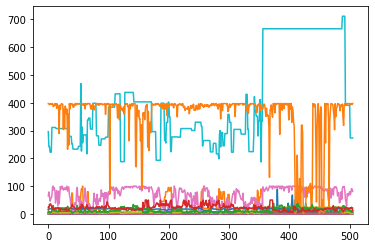

In [11]:
plt.plot(bostondf)
plt.show